# Novel Corona Virus Pandemic - In India
#### An Exploratory Data Visualization and Analysis 


COVID-19 is an infectious disease caused by the Corona Virus, biologically known as severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The disease was first identified in Wuhan, the capital of China's Hubei province in December 2019 and has spread all over the world since then. As of writing this, on 26th April 2020, 21:57 IST, there are 2.92 million confirmed cases throughout the world and has resulted in 204,000 deaths according to Google.

In this notebook, I will take a look at the current situation in India. We will take a look at the regions which are most hampered by the outbreak and how numbers have steadily climbed in the country. 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%matplotlib notebook

In [ ]:
covid19_df = pd.read_csv("covid_19_india.csv")
individuals_df = pd.read_csv("IndividualDetails.csv")
excel_file = pd.ExcelFile("ISPA.xlsx")
indian_states_df = excel_file.parse('Sheet1')

In [ ]:
covid19_df.head()

Sno      Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  30/01/20  6:00 PM               Kerala                       1   
1    2  31/01/20  6:00 PM               Kerala                       1   
2    3  01/02/20  6:00 PM               Kerala                       2   
3    4  02/02/20  6:00 PM               Kerala                       3   
4    5  03/02/20  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                        0      0       0          2  
3                        0      0       0          3  
4                        0      0       0          3

In [ ]:
covid19_df.tail()

Sno      Date     Time              State/UnionTerritory  \
3634  3635  01/07/20  8:00 AM                           Tripura   
3635  3636  01/07/20  8:00 AM                       Uttarakhand   
3636  3637  01/07/20  8:00 AM                     Uttar Pradesh   
3637  3638  01/07/20  8:00 AM                       West Bengal   
3638  3639  01/07/20  8:00 AM  Cases being reassigned to states   

     ConfirmedIndianNational ConfirmedForeignNational  Cured  Deaths  \
3634                       -                        -   1086       1   
3635                       -                        -   2231      41   
3636                       -                        -  16084     697   
3637                       -                        -  12130     668   
3638                       -                        -      0       0   

      Confirmed  
3634       1388  
3635       2881  
3636      23492  
3637      18559  
3638       6915

In [ ]:
covid19_df.shape

(3639, 9)

In [ ]:
covid19_df.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

Here, we see that there are no missing values in this dataset which makes my job more easier. Let us now have a look at the most recent records for each state to gain an idea about where we stand currently. From the last set of records, we can see that we have data till 1st July 2020.

In [ ]:
covid19_df_latest = covid19_df[covid19_df['Date']=="01/07/20"]
covid19_df_latest.head()

Sno      Date     Time         State/UnionTerritory  \
3603  3604  01/07/20  8:00 AM  Andaman and Nicobar Islands   
3604  3605  01/07/20  8:00 AM               Andhra Pradesh   
3605  3606  01/07/20  8:00 AM            Arunachal Pradesh   
3606  3607  01/07/20  8:00 AM                        Assam   
3607  3608  01/07/20  8:00 AM                        Bihar   

     ConfirmedIndianNational ConfirmedForeignNational  Cured  Deaths  \
3603                       -                        -     50       0   
3604                       -                        -   6511     187   
3605                       -                        -     62       1   
3606                       -                        -   5647      12   
3607                       -                        -   7687      67   

      Confirmed  
3603         97  
3604      14595  
3605        191  
3606       8227  
3607      10043

In [ ]:
covid19_df_latest['Confirmed'].sum()

585493

## STATEWISE FIGURES

<IPython.core.display.Javascript object>


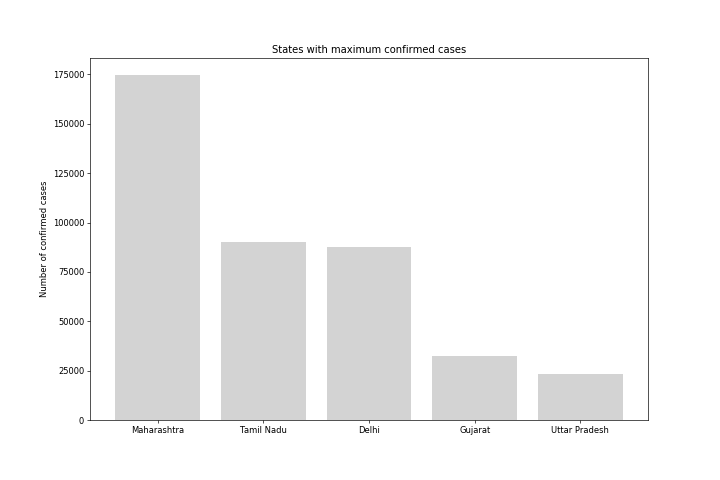

In [ ]:
covid19_df_latest = covid19_df_latest.sort_values(by=['Confirmed'],ascending = False)


plt.figure(figsize=(12,8),dpi = 80)
plt.bar(covid19_df_latest['State/UnionTerritory'][:5],covid19_df_latest['Confirmed'][:5],align='center',color='lightgrey')


plt.ylabel('Number of confirmed cases')
plt.title('States with maximum confirmed cases')
plt.show()

On inspecting the above visualization, we see that Maharashtra has the most number of inspected cases as of now. Maharashtra is almost touching 175000 cases and may well have crossed that figure by the time I upload this notebook. The situation in Maharashtra is so grave that no other state in India has crossed even half that mark as per the data we have. Tamil Nadu and Delhi are about to touch the 100000 mark whereas Gujarat has around 32000 cases and Uttar Pradesh over 22000+ cases.

In [ ]:
covid19_df_latest['Deaths'].sum()

17400

As per the data in the dataset, India has had 17400 deaths across all states. We will now see which states have the most deaths.

<IPython.core.display.Javascript object>


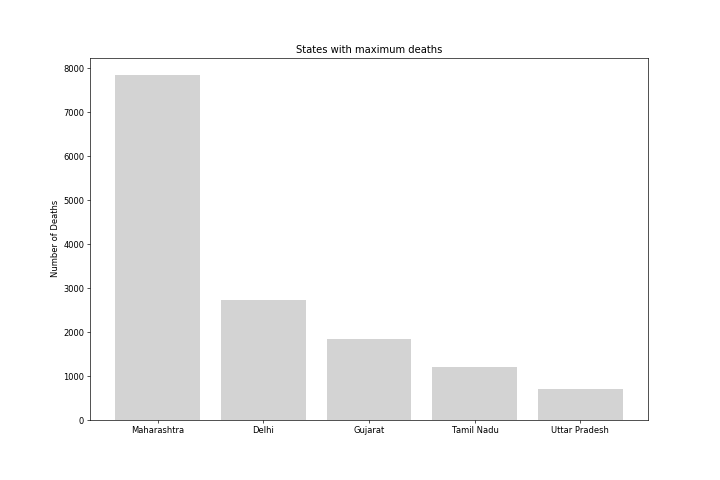

In [ ]:
covid19_df_latest = covid19_df_latest.sort_values(by=['Deaths'],ascending = False)


plt.figure(figsize=(12,8), dpi=80)
plt.bar(covid19_df_latest['State/UnionTerritory'][:5], covid19_df_latest['Deaths'][:5], align='center',color='lightgrey')
plt.ylabel('Number of Deaths')
plt.title('States with maximum deaths')
plt.show()

Next up, I wanted to look at the number of deaths per confirmed cases in different Indian states to gain a better idea about the healthcare facilities available.

In [ ]:
covid19_df_latest['Deaths/Confirmed Cases'] = (covid19_df_latest['Confirmed']/covid19_df_latest['Deaths']).round(2)

covid19_df_latest['Deaths/Confirmed Cases'] = [np.nan if x==float("inf") else x for x in covid19_df_latest['Deaths/Confirmed Cases']]

covid19_df_latest = covid19_df_latest.sort_values(by=['Deaths/Confirmed Cases'], ascending=True,na_position='last')

covid19_df_latest.iloc[:10]

Sno      Date     Time State/UnionTerritory ConfirmedIndianNational  \
3613  3614  01/07/20  8:00 AM              Gujarat                       -   
3622  3623  01/07/20  8:00 AM          Maharashtra                       -   
3621  3622  01/07/20  8:00 AM       Madhya Pradesh                       -   
3637  3638  01/07/20  8:00 AM          West Bengal                       -   
3611  3612  01/07/20  8:00 AM                Delhi                       -   
3636  3637  01/07/20  8:00 AM        Uttar Pradesh                       -   
3629  3630  01/07/20  8:00 AM               Punjab                       -   
3630  3631  01/07/20  8:00 AM            Rajasthan                       -   
3624  3625  01/07/20  8:00 AM            Meghalaya                       -   
3628  3629  01/07/20  8:00 AM           Puducherry                       -   

     ConfirmedForeignNational  Cured  Deaths  Confirmed  \
3613                        -  23662    1846      32557   
3622                        -  90911    7855     174761   
3621                        -  10395     572      13593   
3637                        -  12130     668      18559   
3611                        -  58348    2742      87360   
3636                        -  16084     697      23492   
3629                        -   3867     144       5568   
3630                        -  14220     413      18014   
3624                        -     42       1         52   
3628                        -    272      12        714   

      Deaths/Confirmed Cases  
3613                   17.64  
3622                   22.25  
3621                   23.76  
3637                   27.78  
3611                   31.86  
3636                   33.70  
3629                   38.67  
3630                   43.62  
3624                   52.00  
3628                   59.50

So after creating this new measure and sorting the states based on this figure, I look at the ten worst states in this regard. We see that there are some states like Meghalaya, Puducherry, Punjab and Rajasthan where the number of cases and deaths are pretty low as of now and it appears things are in control. But other states like Gujarat,Maharashtra,Madhya Pradesh look well hit by the condition. We leave West Bengal out of the entire equation since there has been news emerging from the state regarding mispublishing of numbers.

However, these statistics do not always lend a clear picture. India is a country of varying demographics and no two states are the same. May be equating the figures to the estimated population of a state may lend a better idea to the entire picture.

## CASES PER 10 MILLION

In [ ]:
indian_states_df.head()

State  Aadhaar assigned as of 2019  Area (per sq km)
0             Delhi                     21763471              1483
1           Haryana                     28941133             44212
2            Kerala                     36475649             38852
3  Himachal Pradesh                      7560770             55673
4            Punjab                     30355185             50362

 We will rename the number of Aadhaar cards assigned column as Population and discard the Area feature since I decided against using it due to recent updates in States and UTs in India.

In [ ]:
indian_states_df = indian_states_df[['State','Aadhaar assigned as of 2019']]
indian_states_df.columns = ['State/UnionTerritory','Population']
indian_states_df.head()

State/UnionTerritory  Population
0                Delhi    21763471
1              Haryana    28941133
2               Kerala    36475649
3     Himachal Pradesh     7560770
4               Punjab    30355185

We will now merge the Population dataset with our main dataset and create a new feature called Cases/10 Million to gain some more idea on really which cases are more hit by the COVID-19 crisis. I feel this new measure is now a more level headed measure as it takes care of the population differences which exists between different states.

In [ ]:
covid19_df_latest = pd.merge(covid19_df_latest, indian_states_df, on='State/UnionTerritory')

covid19_df_latest['Cases/10million']=(covid19_df_latest['Confirmed']/covid19_df_latest['Population'])*10000000

covid19_df_latest.head()

Sno      Date     Time State/UnionTerritory ConfirmedIndianNational  \
0  3614  01/07/20  8:00 AM              Gujarat                       -   
1  3623  01/07/20  8:00 AM          Maharashtra                       -   
2  3622  01/07/20  8:00 AM       Madhya Pradesh                       -   
3  3638  01/07/20  8:00 AM          West Bengal                       -   
4  3612  01/07/20  8:00 AM                Delhi                       -   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  Deaths/Confirmed Cases  \
0                        -  23662    1846      32557                   17.64   
1                        -  90911    7855     174761                   22.25   
2                        -  10395     572      13593                   23.76   
3                        -  12130     668      18559                   27.78   
4                        -  58348    2742      87360                   31.86   

   Population  Cases/10million  
0    62097024      5242.924363  
1   114063427     15321.387810  
2    74770270      1817.968559  
3    91928327      2018.855407  
4    21763471     40140.655872

In [ ]:
covid19_df_latest.fillna(0, inplace=True)

covid19_df_latest.sort_values(by='Cases/10million',ascending=False)

Sno      Date     Time State/UnionTerritory ConfirmedIndianNational  \
25  3621  01/07/20  8:00 AM               Ladakh                       -   
4   3612  01/07/20  8:00 AM                Delhi                       -   
1   3623  01/07/20  8:00 AM          Maharashtra                       -   
14  3633  01/07/20  8:00 AM           Tamil Nadu                       -   
24  3607  01/07/20  8:00 AM                Assam                       -   
23  3613  01/07/20  8:00 AM                  Goa                       -   
9   3629  01/07/20  8:00 AM           Puducherry                       -   
0   3614  01/07/20  8:00 AM              Gujarat                       -   
10  3615  01/07/20  8:00 AM              Haryana                       -   
28  3624  01/07/20  8:00 AM              Manipur                       -   
13  3609  01/07/20  8:00 AM           Chandigarh                       -   
26  3635  01/07/20  8:00 AM              Tripura                       -   
27  3627  01/07/20  8:00 AM             Nagaland                       -   
15  3605  01/07/20  8:00 AM       Andhra Pradesh                       -   
7   3631  01/07/20  8:00 AM            Rajasthan                       -   
12  3636  01/07/20  8:00 AM          Uttarakhand                       -   
11  3619  01/07/20  8:00 AM            Karnataka                       -   
3   3638  01/07/20  8:00 AM          West Bengal                       -   
6   3630  01/07/20  8:00 AM               Punjab                       -   
2   3622  01/07/20  8:00 AM       Madhya Pradesh                       -   
22  3628  01/07/20  8:00 AM               Odisha                       -   
20  3606  01/07/20  8:00 AM    Arunachal Pradesh                       -   
30  3632  01/07/20  8:00 AM               Sikkim                       -   
29  3626  01/07/20  8:00 AM              Mizoram                       -   
16  3616  01/07/20  8:00 AM     Himachal Pradesh                       -   
19  3620  01/07/20  8:00 AM               Kerala                       -   
5   3637  01/07/20  8:00 AM        Uttar Pradesh                       -   
21  3610  01/07/20  8:00 AM         Chhattisgarh                       -   
17  3608  01/07/20  8:00 AM                Bihar                       -   
18  3618  01/07/20  8:00 AM            Jharkhand                       -   
8   3625  01/07/20  8:00 AM            Meghalaya                       -   

   ConfirmedForeignNational  Cured  Deaths  Confirmed  Deaths/Confirmed Cases  \
25                        -    648       1        973                  973.00   
4                         -  58348    2742      87360                   31.86   
1                         -  90911    7855     174761                   22.25   
14                        -  50074    1201      90167                   75.08   
24                        -   5647      12       8227                  685.58   
23                        -    596       3       1315                  438.33   
9                         -    272      12        714                   59.50   
0                         -  23662    1846      32557                   17.64   
10                        -   9972     236      14548                   61.64   
28                        -    553       0       1234                    0.00   
13                        -    364       6        440                   73.33   
26                        -   1086       1       1388                 1388.00   
27                        -    168       0        459                    0.00   
15                        -   6511     187      14595                   78.05   
7                         -  14220     413      18014                   43.62   
12                        -   2231      41       2881                   70.27   
11                        -   7918     246      15242                   61.96   
3                         -  12130     668      18559                   27.78   
6                         -   386

<IPython.core.display.Javascript object>


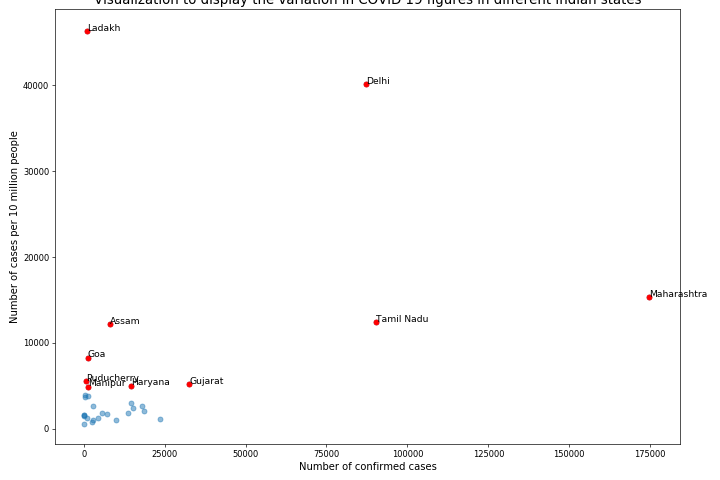

In [ ]:
df = covid19_df_latest[(covid19_df_latest['Confirmed']>=30000)| (covid19_df_latest['Cases/10million']>=4000)]


plt.figure(figsize=(12,8),dpi=80)



plt.scatter(covid19_df_latest['Confirmed'],covid19_df_latest['Cases/10million'],alpha=0.5)


plt.xlabel('Number of confirmed cases',size=12)
plt.ylabel('Number of cases per 10 million people',size=12)
plt.scatter(df['Confirmed'],df['Cases/10million'],color='red')


for i in range(df.shape[0]):
    plt.annotate(df['State/UnionTerritory'].tolist()[i], xy=(df['Confirmed'].tolist()[i],df['Cases/10million'].tolist()[i]),
    xytext = (df['Confirmed'].tolist()[i]+1.0, df['Cases/10million'].tolist()[i]+12.0),size=11)

plt.tight_layout()
plt.title('Visualization to display the variation in COVID 19 figures in different Indian states', size=16)
plt.show()

<IPython.core.display.Javascript object>


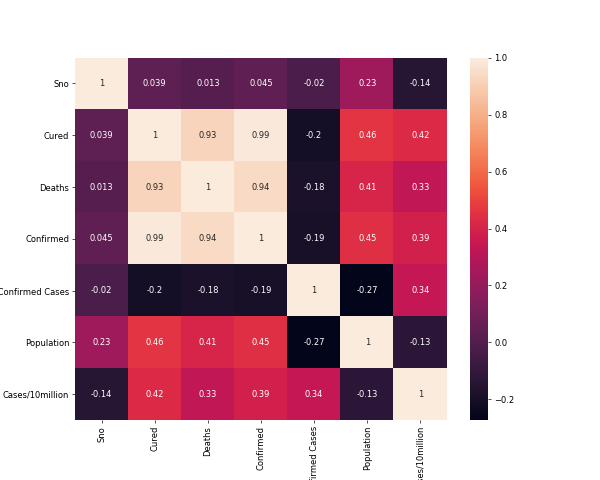

In [ ]:
plt.figure(figsize=(10,8),dpi=80)
sns.heatmap(covid19_df_latest.corr(),annot=True)

We notice that some measures like Confirmed, Cured, Deaths and Cases/10 million are very much co-related and we do not fret to realise the reason.

## INDIVIDUAL DATA


Next up, we have a look at the individual case data which we have. On initial inspection of this dataset, we see that there are a huge number of missing data in this dataset which we must take into consideration as we move forward with our analysis.

In [ ]:
individuals_df.isna().sum()

id                        0
government_id         25185
diagnosed_date            0
age                   25836
gender                22869
detected_city         25832
detected_district      6984
detected_state            0
nationality           25473
current_status            0
status_change_date      402
notes                  1335
dtype: int64

In [ ]:
individuals_df.iloc[0]

id                                       0
government_id                     KL-TS-P1
diagnosed_date                  30/01/2020
age                                     20
gender                                   F
detected_city                     Thrissur
detected_district                 Thrissur
detected_state                      Kerala
nationality                          India
current_status                   Recovered
status_change_date              14/02/2020
notes                 Travelled from Wuhan
Name: 0, dtype: object

The first case in India due to COVID-19 was noticed on 30th January 2020. It was detected in the city of Thrissur in Kerala. The individual had a travel history in Wuhan.

In [ ]:
individuals_grouped_district = individuals_df.groupby('detected_district')

individuals_grouped_district = individuals_grouped_district['id']

individuals_grouped_district.columns=['count']

individuals_grouped_district.count().sort_values(ascending=False).head()

detected_district
Mumbai       3149
Ahmedabad    2181
Indore       1176
Jaipur        808
Pune          706
Name: id, dtype: int64

<IPython.core.display.Javascript object>


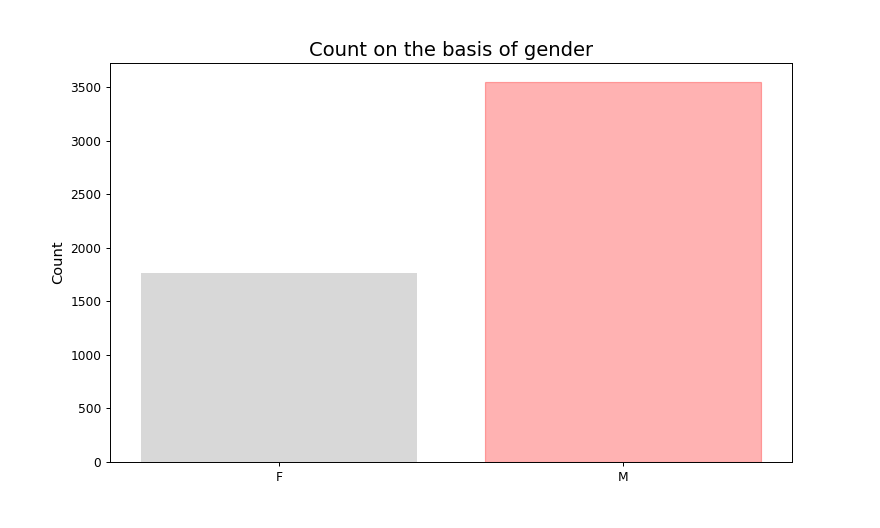

In [ ]:
individuals_grouped_gender = individuals_df.groupby('gender')
individuals_grouped_gender = pd.DataFrame(individuals_grouped_gender.size().reset_index(name='count'))
individuals_grouped_gender.head()

plt.figure(figsize=(10,6),dpi=80)
barlist= plt.bar(individuals_grouped_gender['gender'],individuals_grouped_gender['count'],align='center',color='grey',alpha=0.3)
barlist[1].set_color('r')
plt.ylabel('Count',size=12)
plt.title('Count on the basis of gender',size=16)
plt.show()

From the data, it seems that the virus is affecting males more than females in India. This is also validated by news article.

## PROGRESSION OF CASE COUNT IN INDIA 

In this section, we will have a look at how the number of cases increased in India. Afterwards, we will inspect this curve and find similarities with the state-level curves.

For doing this analysis, I had to modify the dataset a bit. I grouped the data on the basis of the diagnosed data feature so that I had a count of number of cases detected each day throughout India. I followed this up by doing a cumulative sum of this feature and adding it to a new column.

In [ ]:
individuals_grouped_date = individuals_df.groupby('diagnosed_date')

individuals_grouped_date = pd.DataFrame(individuals_grouped_date.size().reset_index(name="count"))

individuals_grouped_date[['Day','Month','Year']] = individuals_grouped_date.diagnosed_date.apply(
    lambda x : pd.Series(str(x).split("/")))

individuals_grouped_date.sort_values(by=['Year','Month','Day'],inplace=True,ascending=True)

individuals_grouped_date.reset_index(inplace=True)
individuals_grouped_date['Cumulative Count'] = individuals_grouped_date['count'].cumsum()
individuals_grouped_date = individuals_grouped_date.drop(['index','Day','Month','Year'],axis=1)
individuals_grouped_date.head()

diagnosed_date  count  Cumulative Count
0     30/01/2020      1                 1
1     02/02/2020      1                 2
2     03/02/2020      1                 3
3     02/03/2020      2                 5
4     03/03/2020      1                 6

In [ ]:
individuals_grouped_date.tail()

diagnosed_date  count  Cumulative Count
54     22/04/2020   1302             21503
55     23/04/2020   1701             23204
56     24/04/2020   1444             24648
57     25/04/2020   1883             26531
58     26/04/2020   1651             28182

## GRAPH TO SHOW HOW THE CASE COUNTS INCREASED IN INDIA

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


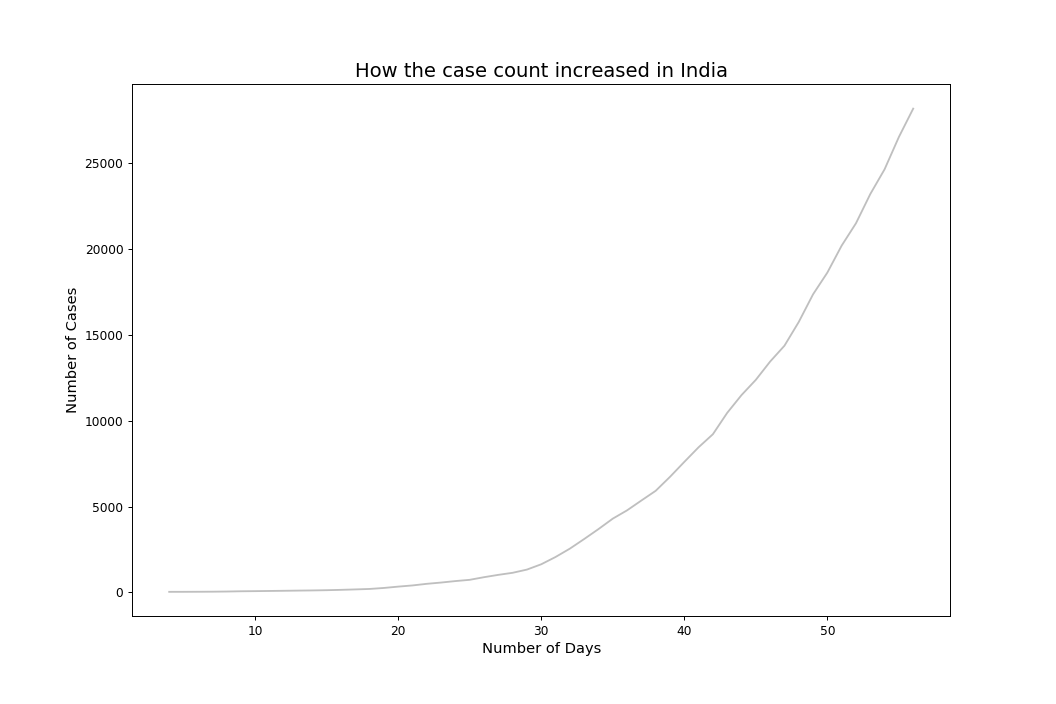

In [ ]:
individuals_grouped_date = individuals_grouped_date.iloc[3:]
individuals_grouped_date.reset_index(inplace=True)
individuals_grouped_date.columns = ['Day Number','diagnosed_date','count','Cumulative Count']
individuals_grouped_date['Day Number']  = individuals_grouped_date['Day Number']-2


plt.figure(figsize=(12,8), dpi=80)
plt.plot(individuals_grouped_date['Day Number'],individuals_grouped_date['Cumulative Count'],color="grey",alpha=0.5)
plt.xlabel('Number of Days', size = 12)
plt.ylabel('Number of Cases', size = 12)
plt.title('How the case count increased in India', size=16)
plt.show()

In the above curve, we see that the rise was more or less steady till the 20th day mark. In the interval between 20-30, the curve inclined a little. This inclination gradually incremented and we see a steady and steep slope after 30-day mark with no signs of flattening. These are ominous indications.

In the next few code elements, I prepare and process the dataset to group the data in terms of different states. I used the following five states for this next analysis:

* Maharashtra
* Tamil Nadu
* Delhi
* Gujarat
* Kerala


In [ ]:
covid19_maharashtra = covid19_df[covid19_df['State/UnionTerritory']=="Maharashtra"]
covid19_maharashtra.head()
covid19_maharashtra.reset_index(inplace=True)
covid19_maharashtra= covid19_maharashtra.drop(['index', 'Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'],  axis = 1)
covid19_maharashtra.reset_index(inplace = True)
covid19_maharashtra.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_maharashtra['Day Count'] = covid19_maharashtra['Day Count'] +8

missing_values = pd.DataFrame({"Day Count":[x for x in range(1,8)],
                              "Date": ["0"+ str(x)+"/06/20" for x in range(2,9)],
                              "State/UnionTerritory": ["Maharashtra"]*7,
                                "Deaths": [0]*7,
                                  "Confirmed": [0]*7})

covid19_maharashtra = covid19_maharashtra.append(missing_values,ignore_index=True)
covid19_maharashtra = covid19_maharashtra.sort_values(by="Day Count", ascending = True)

covid19_maharashtra.reset_index(drop=True, inplace=True)
print(covid19_maharashtra.shape)
covid19_maharashtra.head()

(122, 5)


Day Count      Date State/UnionTerritory  Deaths  Confirmed
0          1  02/06/20          Maharashtra       0          0
1          2  03/06/20          Maharashtra       0          0
2          3  04/06/20          Maharashtra       0          0
3          4  05/06/20          Maharashtra       0          0
4          5  06/06/20          Maharashtra       0          0

In [ ]:
covid19_kerala = covid19_df[covid19_df['State/UnionTerritory'] == "Kerala"]
covid19_kerala = covid19_kerala.iloc[32:]
covid19_kerala.reset_index(inplace = True)
covid19_kerala = covid19_kerala.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_kerala.reset_index(inplace = True)
covid19_kerala.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_kerala['Day Count'] = covid19_kerala['Day Count'] + 1
print(covid19_kerala.shape)
covid19_kerala.head()

(122, 5)


Day Count      Date State/UnionTerritory  Deaths  Confirmed
0          1  02/03/20               Kerala       0          3
1          2  03/03/20               Kerala       0          3
2          3  04/03/20               Kerala       0          3
3          4  05/03/20               Kerala       0          3
4          5  06/03/20               Kerala       0          3

In [ ]:
covid19_delhi = covid19_df[covid19_df['State/UnionTerritory'] == "Delhi"]
covid19_delhi.reset_index(inplace = True)
covid19_delhi = covid19_delhi.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_delhi.reset_index(inplace = True)
covid19_delhi.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_delhi['Day Count'] = covid19_delhi['Day Count'] + 1
print(covid19_delhi.shape)
covid19_delhi.head()

(122, 5)


Day Count      Date State/UnionTerritory  Deaths  Confirmed
0          1  02/03/20                Delhi       0          1
1          2  03/03/20                Delhi       0          1
2          3  04/03/20                Delhi       0          1
3          4  05/03/20                Delhi       0          2
4          5  06/03/20                Delhi       0          3

In [ ]:
covid19_gujarat = covid19_df[covid19_df['State/UnionTerritory'] == "Gujarat"]
covid19_gujarat.reset_index(inplace = True)
covid19_gujarat = covid19_gujarat.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_gujarat.reset_index(inplace = True)
covid19_gujarat.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_gujarat['Day Count'] = covid19_gujarat['Day Count'] + 19
missing_values = pd.DataFrame({"Day Count": [x for x in range(1,19)],
                           "Date": [("0" + str(x) if x < 10 else str(x))+"/03/20" for x in range(2,20)],
                           "State/UnionTerritory": ["Gujarat"]*18,
                           "Deaths": [0]*18,
                           "Confirmed": [0]*18})
covid19_gujarat = covid19_gujarat.append(missing_values, ignore_index = True)
covid19_gujarat = covid19_gujarat.sort_values(by="Day Count", ascending = True)
covid19_gujarat.reset_index(drop=True, inplace=True)
print(covid19_gujarat.shape)
covid19_gujarat.head()

(122, 5)


Day Count      Date State/UnionTerritory  Deaths  Confirmed
0          1  02/03/20              Gujarat       0          0
1          2  03/03/20              Gujarat       0          0
2          3  04/03/20              Gujarat       0          0
3          4  05/03/20              Gujarat       0          0
4          5  06/03/20              Gujarat       0          0

In [ ]:
covid19_tamilnadu = covid19_df[covid19_df['State/UnionTerritory'] == "Tamil Nadu"]
covid19_tamilnadu.reset_index(inplace = True)
covid19_tamilnadu = covid19_tamilnadu.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_tamilnadu.reset_index(inplace = True)
covid19_tamilnadu.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_tamilnadu['Day Count'] = covid19_delhi['Day Count'] + 1
print(covid19_tamilnadu.shape)
covid19_tamilnadu.head()

(117, 5)


Day Count      Date State/UnionTerritory  Deaths  Confirmed
0          2  07/03/20           Tamil Nadu       0          1
1          3  08/03/20           Tamil Nadu       0          1
2          4  09/03/20           Tamil Nadu       0          1
3          5  10/03/20           Tamil Nadu       0          1
4          6  11/03/20           Tamil Nadu       0          1

<IPython.core.display.Javascript object>


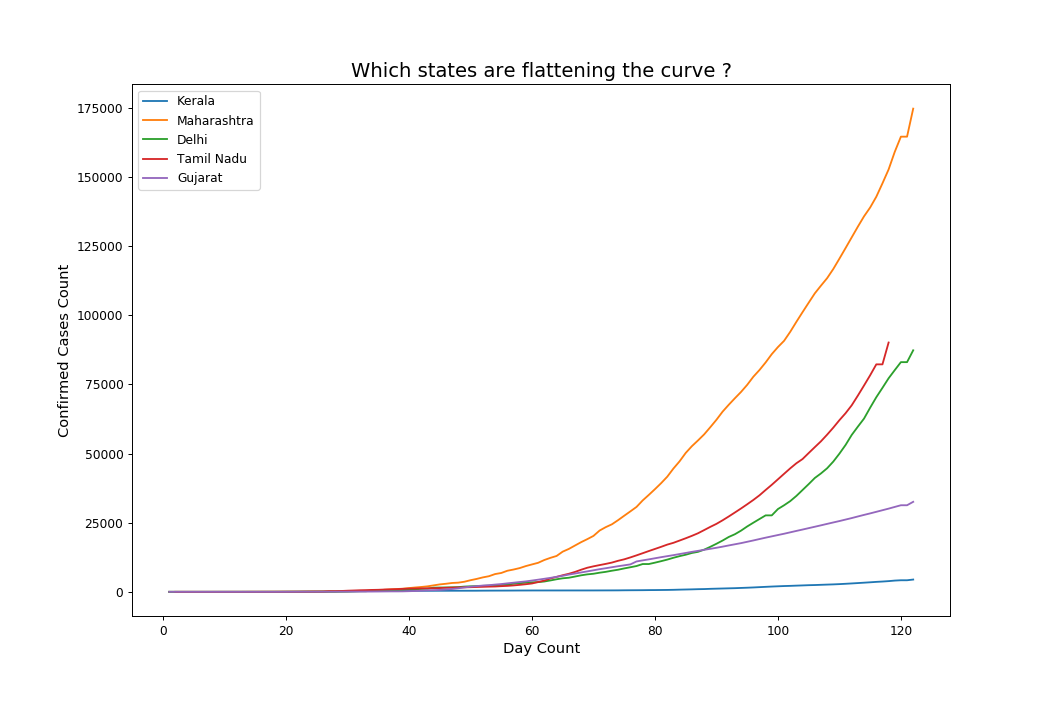

In [ ]:
plt.figure(figsize=(12,8), dpi=80)
plt.plot(covid19_kerala['Day Count'], covid19_kerala['Confirmed'])
plt.plot(covid19_maharashtra['Day Count'], covid19_maharashtra['Confirmed'])
plt.plot(covid19_delhi['Day Count'], covid19_delhi['Confirmed'])
plt.plot(covid19_tamilnadu['Day Count'], covid19_tamilnadu['Confirmed'])
plt.plot(covid19_gujarat['Day Count'], covid19_gujarat['Confirmed'])
plt.legend(['Kerala', 'Maharashtra', 'Delhi', 'Tamil Nadu', 'Gujarat'], loc='upper left')
plt.xlabel('Day Count', size=12)
plt.ylabel('Confirmed Cases Count', size=12)
plt.title('Which states are flattening the curve ?', size = 16)
plt.show()

We see almost all the curves follow the curve which is displayed by the nation as a whole. The only anomaly is that of Kerala. Kerala's curve saw the gradual incline in the period between 20-30 days as seen in other curves. But what Kerala managed to do was it did not let the curve incline further and manage to flatten the curve. As a result, the state has been able to contain the situation.

The situation in Maharashtra looks very grave indeed. The curve has had an immense steep incline and shows no signs of slowing down. Gujarat's curve steeped at a later time interval compared to the rest. It remained in control till the 30-day mark and the steep worsened after 40 days.

The only way we can as a whole prevent this impending crisis is by flattening the curve. All state governments needs to follow the Kerala model. It is the only state which managed to flatten the curve and hence, must have done most things right. It's time we followed the Kerala model.

Thank you!